# Сборный проект по предобработке, исследовательскому и статистическому анализу данных

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
У нас есть данные до 2016 года, по которым нужно спланировать кампанию на 2017-й.
  
  В проекте мы:  
Откроем файл с данными и изучим общую информацию.  
  
Подготовим данные: заменим названия столбцов, приведя к нижнему регистру, преобразуем данные в нужные типы, обработаем пропуски. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.  
  
Проведём исследовательский анализ данных:  
Посмотрим, сколько игр выпускалось в разные годы;  
Посмотрим, как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам; 
Возьмём данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год;  
Посмотрим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ;  
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;  
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами;  
Соотнесём выводы с продажами игр на других платформах;  
Посмотрим на общее распределение игр по жанрам.  
  
Составим портрет пользователя каждого региона:  
Определим для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5), опишем различия в долях продаж;  
Самые популярные жанры (топ-5), поясним разницу;  
Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.  
  
Проверим гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
  
Напишем общий вывод

## Загрузка данных

Сначала импортируем необходимые для проекта библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

pd.options.mode.chained_assignment = None

Считываем CSV-файл с данными и сохраняем его в датафрейм.
Выведем первые строки таблицы и изучим общую информацию.

In [2]:
games = pd.read_csv('documents/datasets/games.csv')
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.duplicated().sum()

0

In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Описание данных:  
Name — название игры, Platform — платформа, Year_of_Release — год выпуска, Genre — жанр игры
  
Продажи (в миллионах проданных копий):  
NA_sales — в Северной Америке, EU_sales — в Европе, JP_sales — в Японии, Other_sales — в других странах
  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию).

Всего в данных 16715 строк, из них без пропусков только платформа и продажи, и очень много в оценках и рейтинге.
Дубликатов нет. 

## Подготовка данных

### Заменим названия столбцов, приведя к нижнему регистру

In [5]:
games.rename(columns=str.lower, inplace=True)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы, опишем, в каких столбцах заменили тип данных и почему

Имена, платформы, жанр и рейтинг у нас заданы строками, продажи и оценки критиков - тип float. Посмотрим пропуски в годах выпуска и значения в оценках пользователей.

In [6]:
games['year_of_release'].isna().sum()

269

In [7]:
games['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Год выпуска изменить из float на int не сможем, поскольку там есть пропущенные значения, оценку пользователей изменить из строки на float, чтобы иметь возможность работать с этим столбцом как с числами, так же не можем изменить, потому что в этом столбце есть значение tbd.  
  
Поэтому типы данных пока оставим как есть.

### Обработаем пропуски
(при необходимости):  
Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;  
Опишем причины, которые могли привести к пропускам;  
Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать.

Сначала посмотрим, что за игры без названия и удалим их, проверив результат

In [8]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
games = games.dropna(subset=['name'])
games.reset_index(drop=True, inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас 269 пропусков в столбце года выпуска, 8578 в столбце оценки критиков, 6701 - оценки пользователей, 6766 - в рейтинге ERSB. Чем запонять их неизвестно, ведь это данные каждой конкретной игры, ни среднюю, ни медианную оценку одной игре по данным других ставить неправильно, как и самим присваивать подходящую возрастную категорию за организацию ESRB.  

Год выпуска скорее всего был неизвестен, поэтому не заполнили.

In [10]:
games[games['rating'].isna()]['year_of_release'].value_counts()

year_of_release
2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1992.0     41
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: count, dtype: int64

In [11]:
games[games['user_score'].isna()]['year_of_release'].value_counts()

year_of_release
2010.0    457
2008.0    440
2011.0    418
2009.0    407
2007.0    376
1998.0    348
2006.0    330
1999.0    299
2012.0    290
2015.0    271
1997.0    270
1996.0    255
2005.0    235
2014.0    231
2013.0    225
1995.0    219
2016.0    206
2000.0    200
2002.0    173
2004.0    166
2003.0    164
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: count, dtype: int64

In [12]:
games[games['critic_score'].isna()]['year_of_release'].value_counts()

year_of_release
2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    190
2001.0    156
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: count, dtype: int64

Можем предположить, что пропуски в столбце рейтинга связаны с тем, что данные игры ERSB оценивать по каким-то причинам просто не бралась, так как пропуски есть за разные года. Да и по данным об этой компании, она работает с 1994ого года на рынках США и Канады. Та же картина в оценках критиков и пользователей, то есть это не объяснить новизной или наоборот старостью игры, просто оценок нет. Ну и сбои базы данных никто не отменял.

В столбце оценок пользователей есть 2424 игры с "оценкой" tbd, выведем часть таких строк.

In [13]:
games[games['user_score']=='tbd'].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
717,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
725,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
820,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
880,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1046,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Это абсолютно разные игры как по году выпуска, так и по жанру, и по рынкам..  
TBD означет to be determined, то есть "будет определено", обработать это значение можем только отсеиванием этих строк при работе с этим столбцом, удалять или заполнять какими-то значимыми цифрами неправильно.

Но при этом и с таблицей с пропусками работать не хочется, поэтому заменим их просто на нули, что даст нам возможность обозначить пропуски и как бы отстроиться от них, как в столбце года выпуска, так и в оценках.  
TBD в оценках пользователей также заменим на нули.  
А вот столбец с рейтингом строковый, то есть категориальный, в него вместо пропусков можем проставить RP» («Rating Pending») — «Рейтинг ожидается», которое и используется у ESRB.

In [14]:
games['year_of_release'].fillna(0, inplace=True)
games['critic_score'].fillna(0, inplace=True)
games['user_score'].fillna(0, inplace=True) 
games.loc[games['user_score']=='tbd', 'user_score'] = 0
games['rating'].fillna('RP', inplace=True) 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


/var/folders/qm/npnmpfw50z7_yqn218qvz3m40000gn/T/ipykernel_4170/2831663537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['year_of_release'].fillna(0, inplace=True)
/var/folders/qm/npnmpfw50z7_yqn218qvz3m40000gn/T/ipykernel_4170/2831663537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Теперь, когда пропусков нет, вернёмся к изменению типов данных: сможем поменять тип столбца года выпуска на int, а оценку пользователей на float

In [15]:
games['year_of_release']=games['year_of_release'].astype(int)
games['user_score']=pd.to_numeric(games['user_score'], errors = 'raise')
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [16]:
games['sum_sales']=games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,RP,28.31


Посчитали, добавили, проверили.

**Общий вывод  
При подготовке данных мы заменили названия столбцов, приведя их к нижнему регистру, обработали пропуски, удалив две игры без названия, а также заполнив числовые столбцы нулями, а категорию рейтинга на «рейтинг ожидается», преобразовали данные в нужные типы - тип столбца года выпуска на int, а оценку пользователей на float. И посчитали суммарные продажи во всех регионах, записав их в отдельный столбец.**

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [17]:
games.query('year_of_release>0').groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

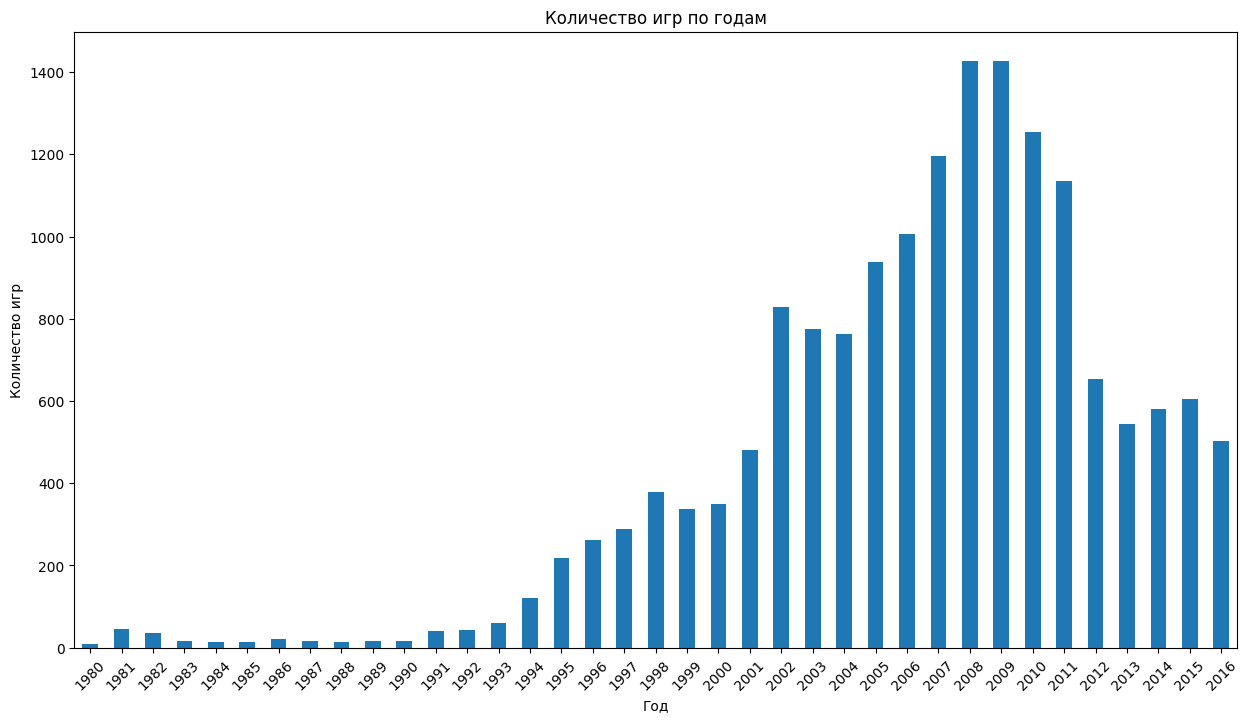

In [18]:
games.query('year_of_release>0')['year_of_release'].value_counts().sort_index().plot(kind='bar', rot=45, figsize=(15,8))
plt.title("Количество игр по годам")
plt.xlabel("Год")
plt.ylabel("Количество игр")
plt.show()

Небольшую часть игр без данных по году выпуска мы уже условились не рассматривать, до 1994ого года выпускалось всего менее 100 игр в год, дальше до 2008ого года был рост, пик пришёлся на 2008-2009ый года, где выпускали почти по 1.5 тысячи игр в год, после этого и до 2012ого наблюдаем спад, а с 2012ого - резкий спад примерно в два раза от пика, что можно объяснить тем, что начали выпускать более качественные и соответственно дорогие в производстве игры. Актуальным  выберем как раз этот период с 2012ого года.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
games.query('year_of_release>0').groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Видим максимальные продажи у PS2, X360, PS3, Wii, DS и PS, более 700 миллионов копий, тогда как у остальных уже меньше больше чем в два раза от этого (менее 320), - их и возьмём для анализа распределения по годам.

In [20]:
games_pl_top=games.query('year_of_release>0').loc[games['platform'].isin (['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
print(games_pl_top.shape)
games_pl_top.head(10)

(9262, 12)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,RP,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


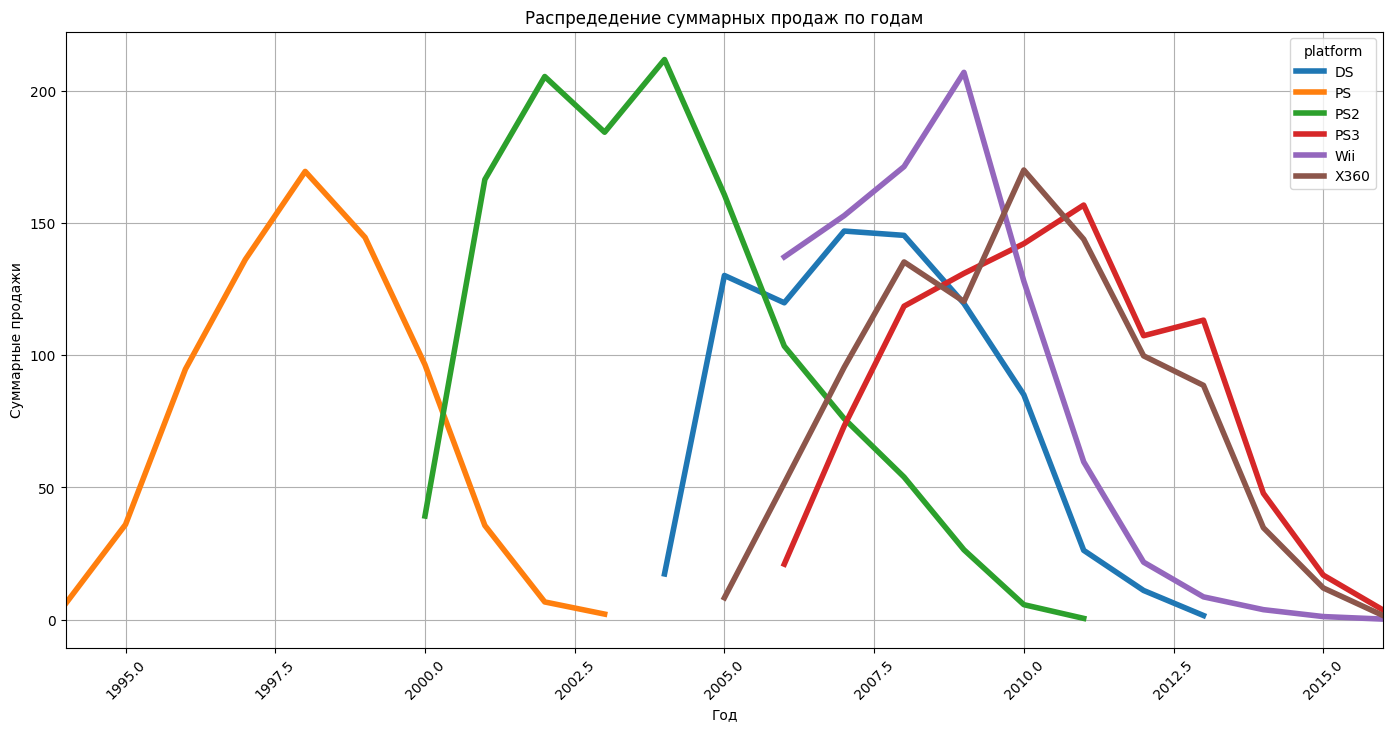

In [21]:
games_pl_top.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')\
            .plot(kind='line', grid=True, rot=45, figsize=(17,8), linewidth=4)
plt.title("Распредедение суммарных продаж по годам")
plt.xlabel("Год")
plt.xlim([1994,2016])
plt.ylabel("Суммарные продажи")
plt.show()

Видим, что сначала, разные версии одной платформы (PS) были популярны по очереди, что логично, а остальные примерно в одно время с 2005ого до 2012ого, дальше видимо выходили новые версии, которые ещё не успели набрать те продажи, что эти версии.  
Видим также, что средняя "продолжительность жизни" платформы около 7 лет, дальше продажи быстро идут на спад, что у всех ТОП-6 платформ почти одинаково.

### Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Отсеим данные за предыдущие годы.

Актуальный период мы выбрали ранее - с 2012ого года

In [22]:
games_act=games.query('year_of_release>=2012')
games_act.reset_index(drop=True, inplace=True) # сбросим индексы в новой таблице
print(games_act.shape)
games_act['year_of_release'].value_counts()

(2886, 12)


year_of_release
2012    653
2015    606
2014    581
2013    544
2016    502
Name: count, dtype: int64

Получили данные по играм за последние 5 лет, почти 3 тысячи строк, далее работаем только с этими данными.

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [23]:
games_act.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

За актуальный период лидируют уже платформы PS4, PS3, X360, 3DS и XOne - продано более 150 миллионов игр у каждой.

In [24]:
games_act

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,RP,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


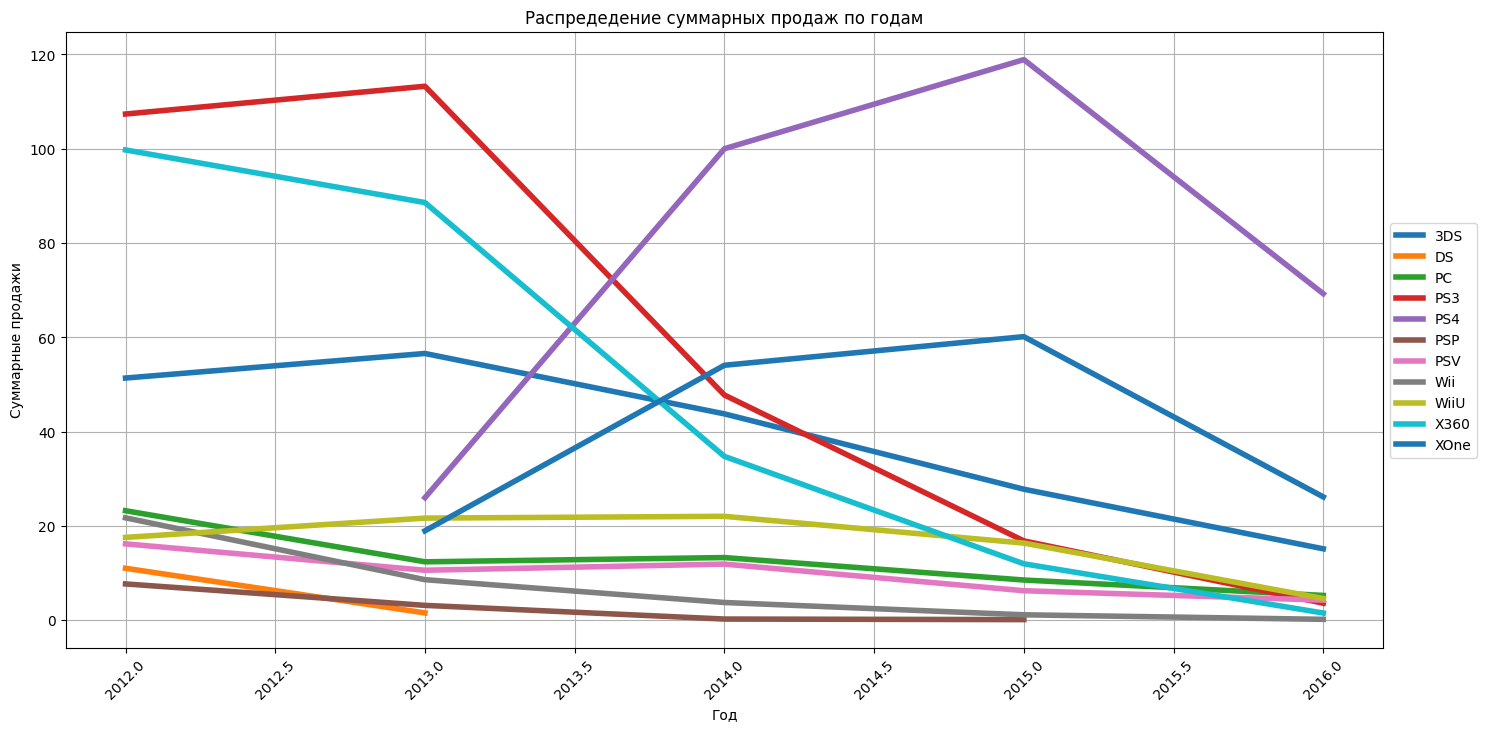

In [25]:
games_act.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')\
            .plot(kind='line', grid=True, rot=45, figsize=(17,8), linewidth=4)
plt.title("Распредедение суммарных продаж по годам")
plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.legend(bbox_to_anchor=(1,0.7),loc='upper left')
plt.show()

Отсеим платформы, продажи игр которых уже закончились, это DS и PSP.

In [26]:
games_act_pl_top=games_act.loc[~games_act['platform'].isin(['DS', 'PSP'])]
games_act_pl_top.shape

(2682, 12)

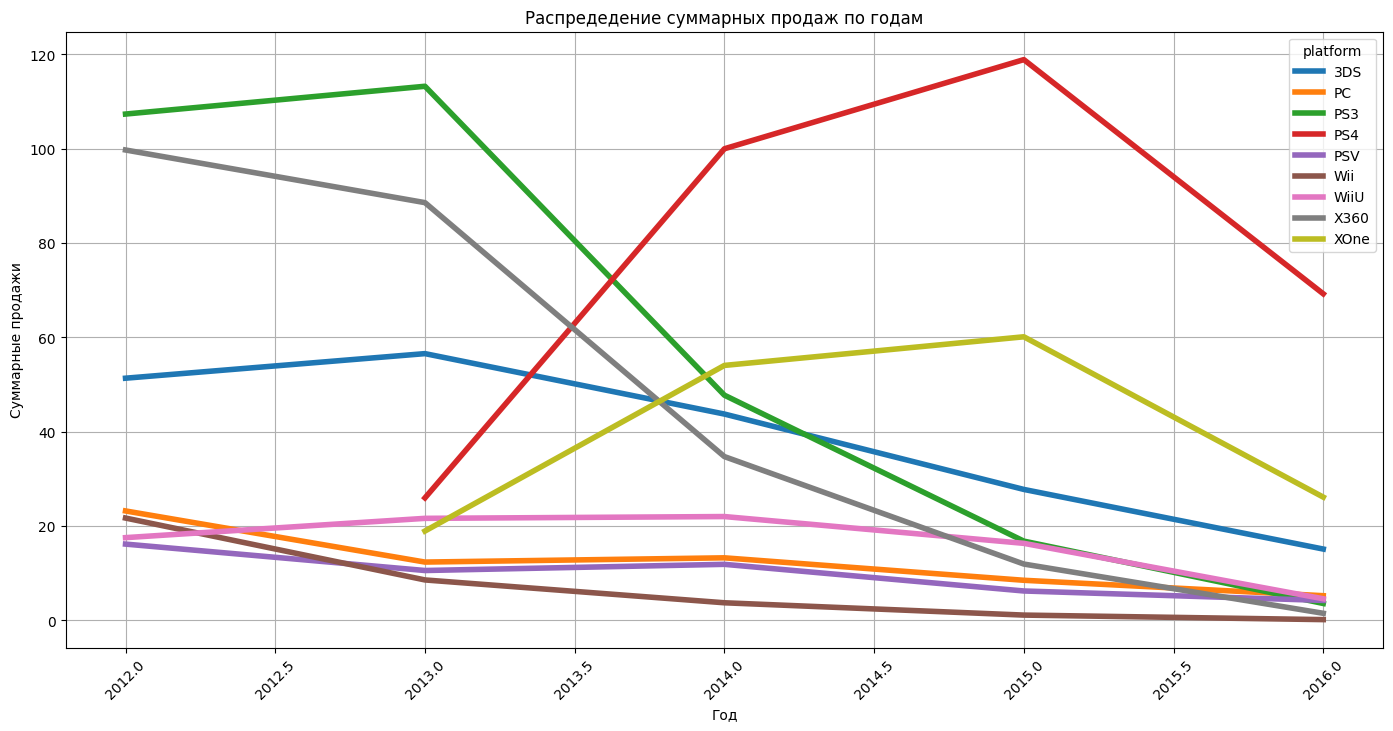

In [27]:
games_act_pl_top.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')\
            .plot(kind='line', grid=True, rot=45, figsize=(17,8), linewidth=4)
plt.title("Распредедение суммарных продаж по годам")
plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.show()

Поскольку в задании у нас есть пометка, что данные за 2016ый год могут быть неполными, то можем смело сказать, что продажи PS4 и XOne растут, что логично, так как это новые платформы 2013ого года, будем считать эти платформы потенциально прибыльными, у остальных же платформ с 2013-14ого годов продажи падают.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

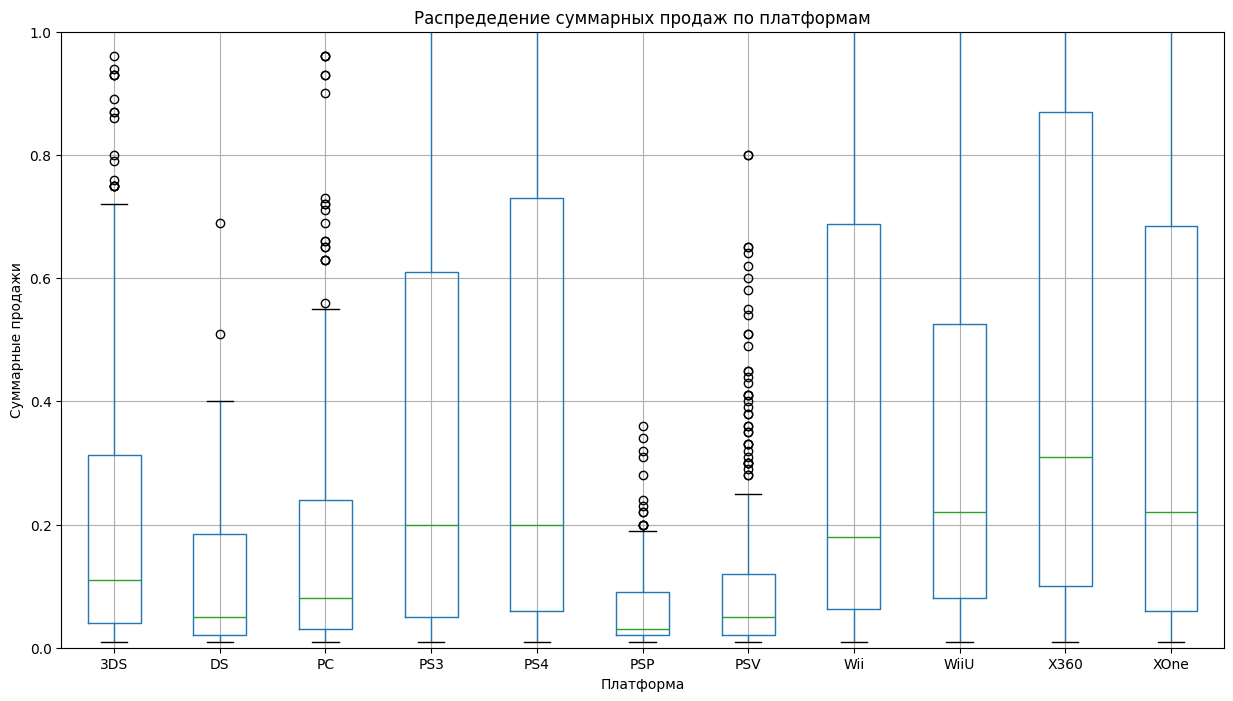

In [28]:
games_act.pivot_table(index='name', columns='platform', values='sum_sales')\
            .boxplot(grid=True, figsize=(15,8))
plt.title("Распредедение суммарных продаж по платформам")
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи")
plt.ylim([0,1])
plt.show()

Видим, что за актуальный период выше уровень продаж у игр платформ PlayStation, X-Box и Nintendo - медиана на уровне 200 тысяч копий на игру, у Х360 даже на уровне 300 тысяч, у остальных же платформ гораздо ниже - 50-100 тысяч копий на игру.  
  
Далее ещё отдельно рассмотрим 5 наиболее перспективных платформ актуального периода

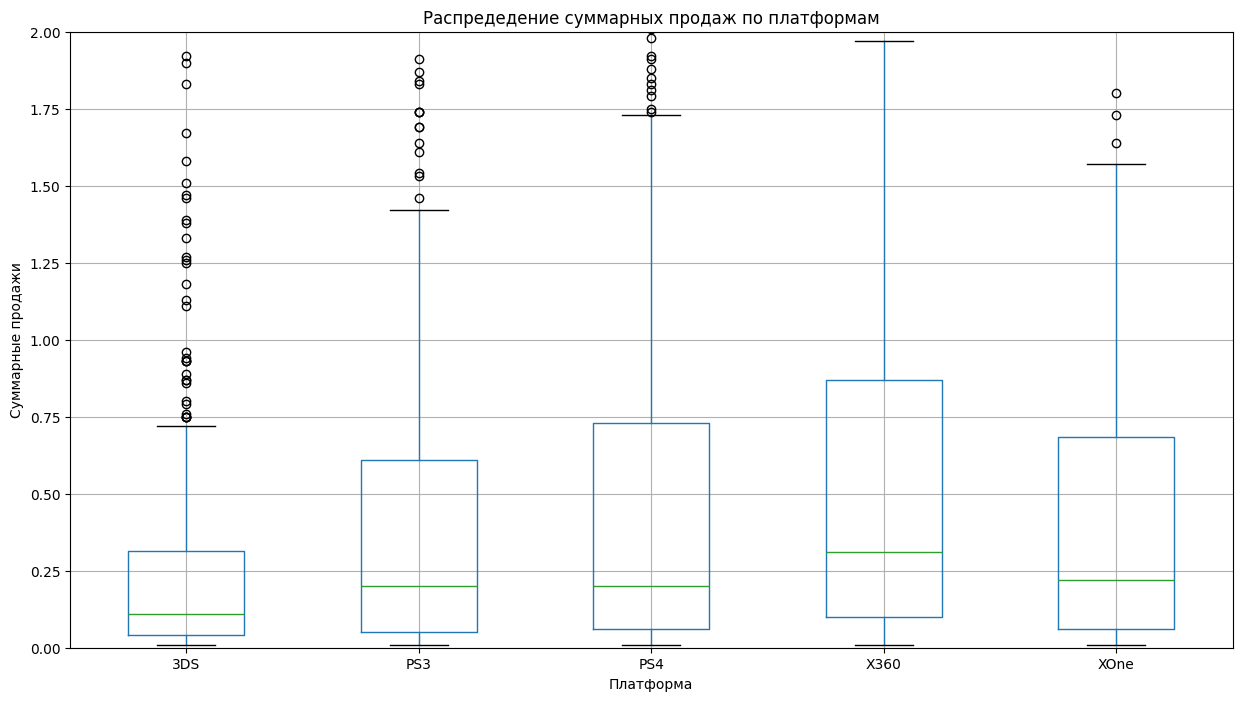

In [29]:
games_act_pl_top5=games_act.loc[games_act['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])] 
games_act_pl_top5.pivot_table(index='name', columns='platform', values='sum_sales')\
            .boxplot(grid=True, figsize=(15,8))
plt.title("Распредедение суммарных продаж по платформам")
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи")
plt.ylim([0,2])
plt.show()

Видим, что за актуальный период выше уровень продаж у игр платформы X360, у остальных (PS4, PS3 и XOne) примерно одинаковые показатели и 3DS замыкает рейтинг.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Рассмотрим самую популярную платформу PS4

In [30]:
games_ps4=games_act.loc[games_act['platform']=='PS4']
games_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,RP,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
2803,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,RP,0.01
2805,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2814,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
2815,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


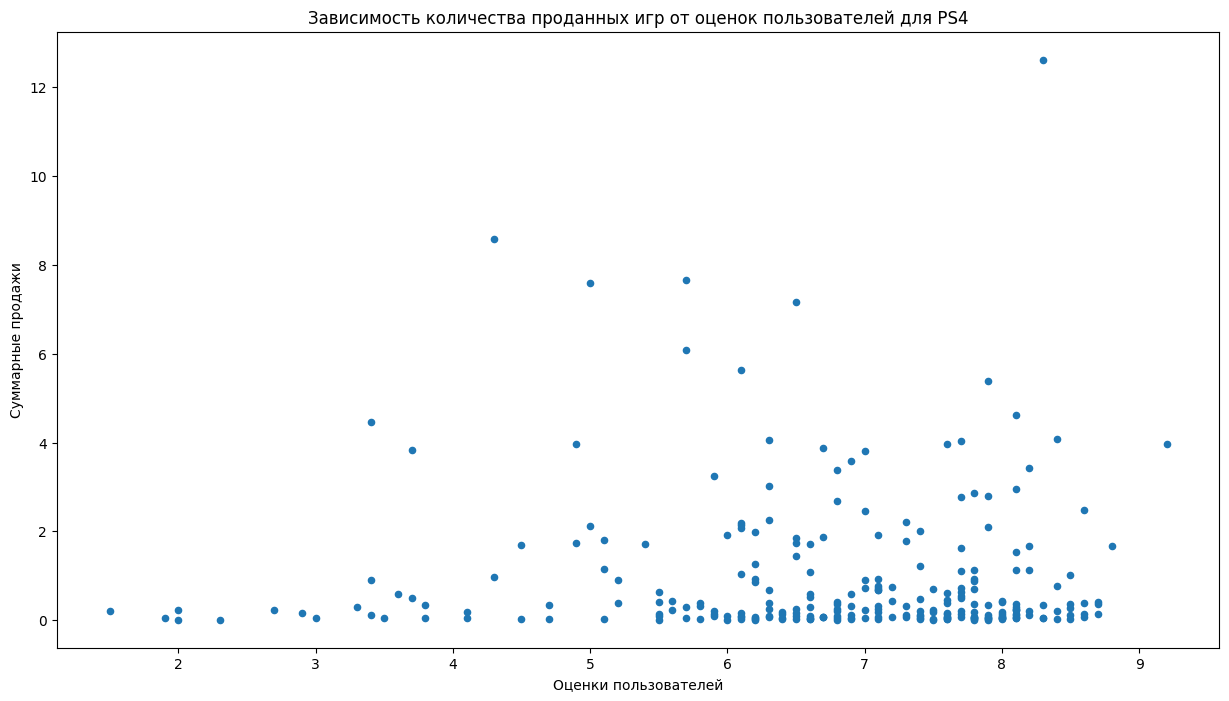

In [31]:
games_ps4.query('user_score>0').plot(x='user_score', y='sum_sales', kind='scatter', figsize=(15,8))
plt.title("Зависимость количества проданных игр от оценок пользователей для PS4")
plt.xlabel("Оценки пользователей")
plt.ylabel("Суммарные продажи")
plt.show()

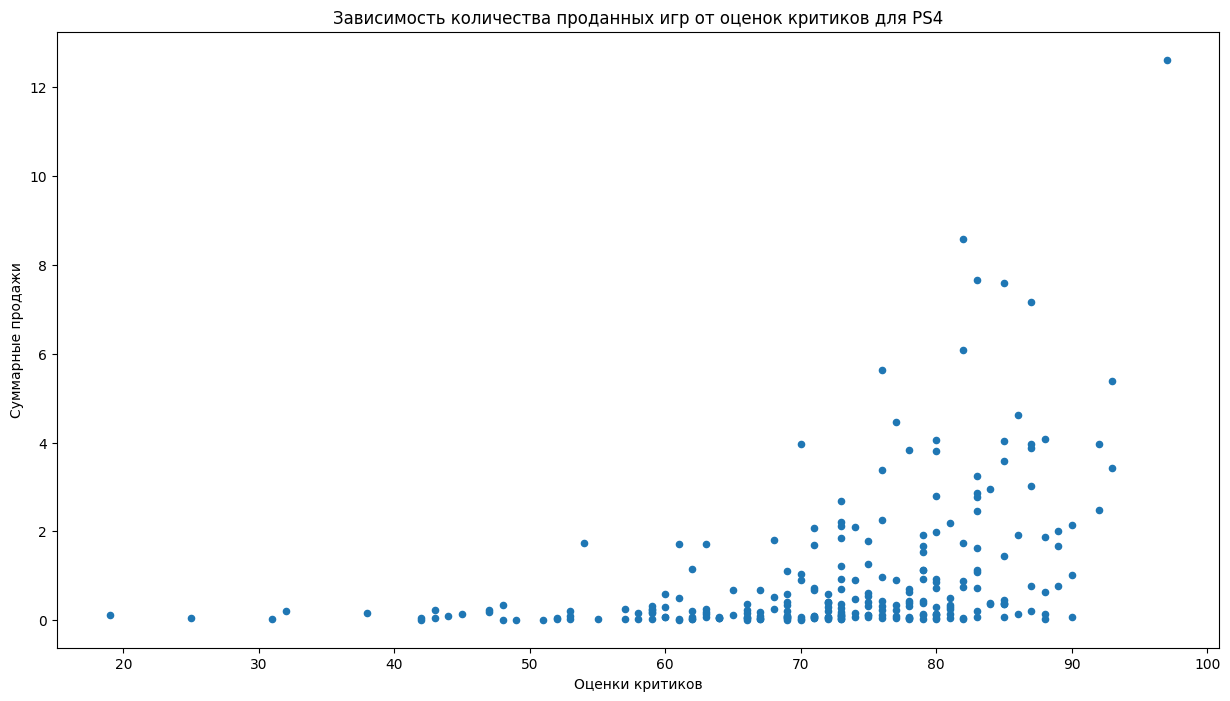

In [32]:
games_ps4.query('critic_score>0').plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(15,8))
plt.title("Зависимость количества проданных игр от оценок критиков для PS4")
plt.xlabel("Оценки критиков")
plt.ylabel("Суммарные продажи")
plt.show()

In [33]:
print('Коэффициент корреляции цены игры PS4 от:')
print('оценок пользователей -',games_ps4['user_score'].corr(games_ps4['sum_sales']).round(2))
print('оценок критиков -',games_ps4['critic_score'].corr(games_ps4['sum_sales']).round(2))

Коэффициент корреляции цены игры PS4 от:
оценок пользователей - 0.11
оценок критиков - 0.23


Видим, как по диаграмме рассеяния ("ровный" график), так и по коэффициенту корреляции (0.11), что от оценок пользователей продажи игр платформы PS4 не зависят, что можно объяснить тем, что пользователи друг к другу прислушиваются очень мало и хотят сформировать своё мнение об игре, поиграв в неё.  
От оценок критиков же (коэффициент корреляции - 0.23) продажи зависят немного больше, возможно некоторые игры были оценены до старта продаж, да и в целом к авторитетному мнению всегда доверия немного больше, как и само мнение может быть более развёрнуто, что может повлиять на решение пользователя о покупке игры.

### Соотнесём выводы с продажами игр на других платформах.

Рассмотрим и остальные платформы, лидирующие по продажам платформы - PS3, X360, 3DS и XOne. Начнём со второй потенциально прибыльной XOne.

In [34]:
games_xone=games_act.loc[games_act['platform']=='XOne']
print('Коэффициент корреляции цены игры XOne от:')
print('оценок пользователей -',games_xone['user_score'].corr(games_xone['sum_sales']).round(2))
print('оценок критиков -',games_xone['critic_score'].corr(games_xone['sum_sales']).round(2))

Коэффициент корреляции цены игры XOne от:
оценок пользователей - 0.12
оценок критиков - 0.27


In [35]:
games_ps3=games_act.loc[games_act['platform']=='PS3']
print('Коэффициент корреляции цены игры PS3 от:')
print('оценок пользователей -',games_ps3['user_score'].corr(games_ps3['sum_sales']).round(2))
print('оценок критиков -',games_ps3['critic_score'].corr(games_ps3['sum_sales']).round(2))

Коэффициент корреляции цены игры PS3 от:
оценок пользователей - 0.21
оценок критиков - 0.3


In [36]:
games_x360=games_act.loc[games_act['platform']=='X360']
print('Коэффициент корреляции цены игры X360 от:')
print('оценок пользователей -',games_x360['user_score'].corr(games_x360['sum_sales']).round(2))
print('оценок критиков -',games_x360['critic_score'].corr(games_x360['sum_sales']).round(2))

Коэффициент корреляции цены игры X360 от:
оценок пользователей - 0.1
оценок критиков - 0.26


In [37]:
games_3ds=games_act.loc[games_act['platform']=='3DS']
print('Коэффициент корреляции цены игры 3DS от:')
print('оценок пользователей -',games_3ds['user_score'].corr(games_3ds['sum_sales']).round(2))
print('оценок критиков -',games_3ds['critic_score'].corr(games_3ds['sum_sales']).round(2))

Коэффициент корреляции цены игры 3DS от:
оценок пользователей - 0.13
оценок критиков - 0.15


В целом уже по коэффициентам корреляции видим, что и для остальных платформ картина похожая, разве что для PS3 продажи от оценок зависят немного больше чем у остальных, а вот при покупке игр платформы DS3 покупатели даже на оценки критиков практически не смотрят - коэффициенты корреляции почти нулевые.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для начала посмотрим, игры каких жанров вообще у нас есть в данных

In [38]:
games_act['genre'].value_counts()

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

Больше всего и с большим отрывом у нас игр жанра экшен, потом примерно поровну ролевых, приключений, спорта, шутеров и миск. Отстают гонки, драки, платформеры, симуляторы, стратегии и пазлы.  
Разделим таблицу по жанрам с большим количеством игр и наоборот

In [39]:
games_act_gen_top=games_act.loc[games_act['genre'].isin(['Action', 'Role-Playing', 'Adventure', 'Sports',\
                                                         'Shooter', 'Misc'])]
games_act_gen_top.shape

(2398, 12)

In [40]:
games_act_gen_untop=games_act.loc[games_act['genre'].isin(['Racing', 'Fighting', 'Platform', 'Simulation',\
                                                         'Strategy', 'Puzzle'])]
games_act_gen_untop.shape

(488, 12)

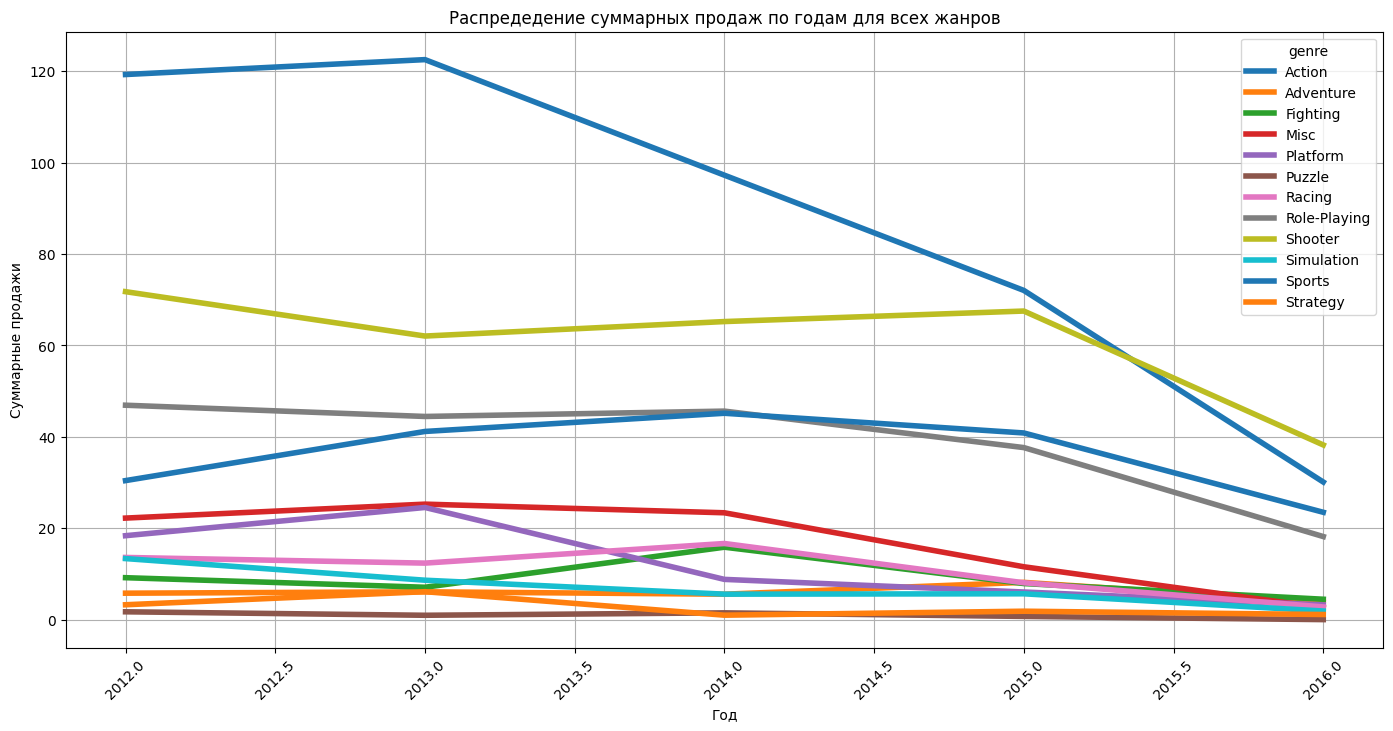

In [41]:
games_act.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum')\
            .plot(kind='line', grid=True, rot=45, figsize=(17,8), linewidth=4)
plt.title("Распредедение суммарных продаж по годам для всех жанров")
plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.show()

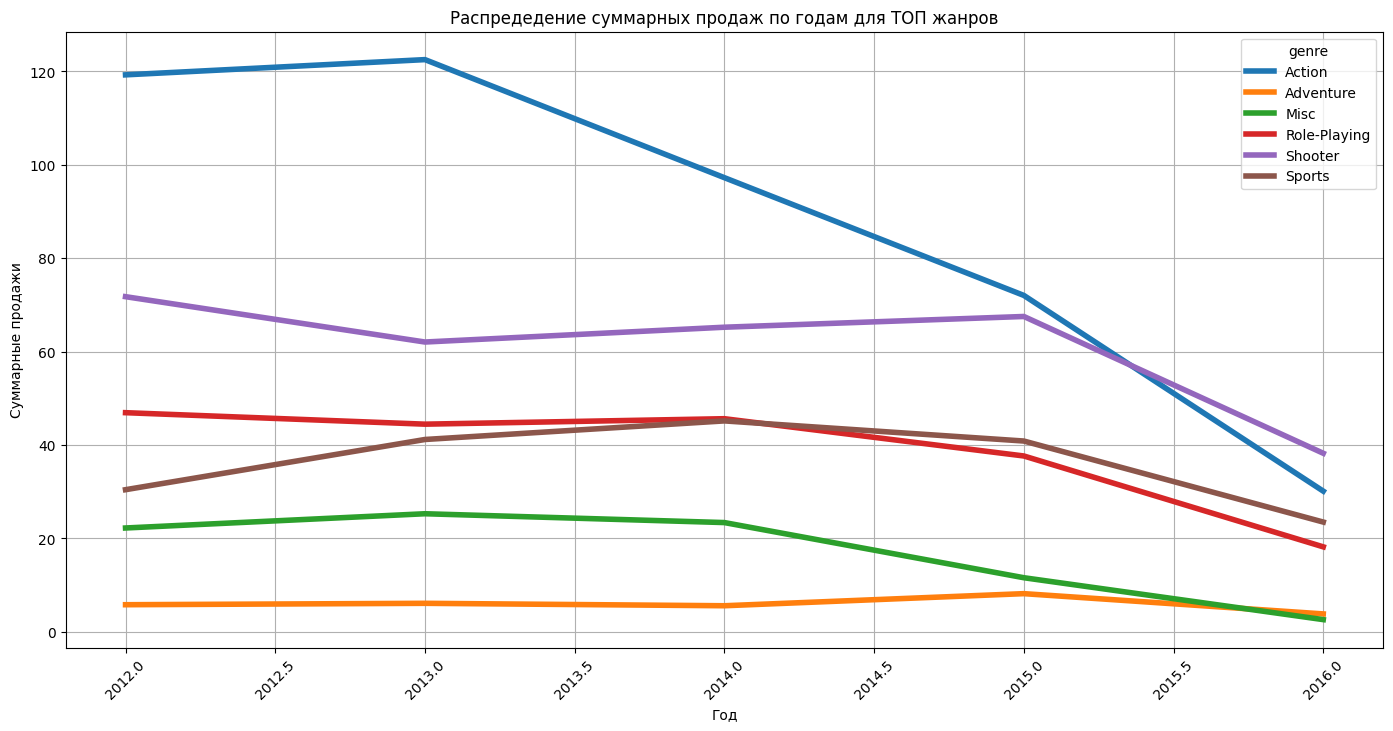

In [42]:
games_act_gen_top.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum')\
            .plot(kind='line', grid=True, rot=45, figsize=(17,8), linewidth=4)
plt.title("Распредедение суммарных продаж по годам для ТОП жанров")
plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.show()

Видим, что по продажам у нас лидируют экшены и шутеры, затем идут ролевые и спортивные игры, ещё меньше у миск и приключений

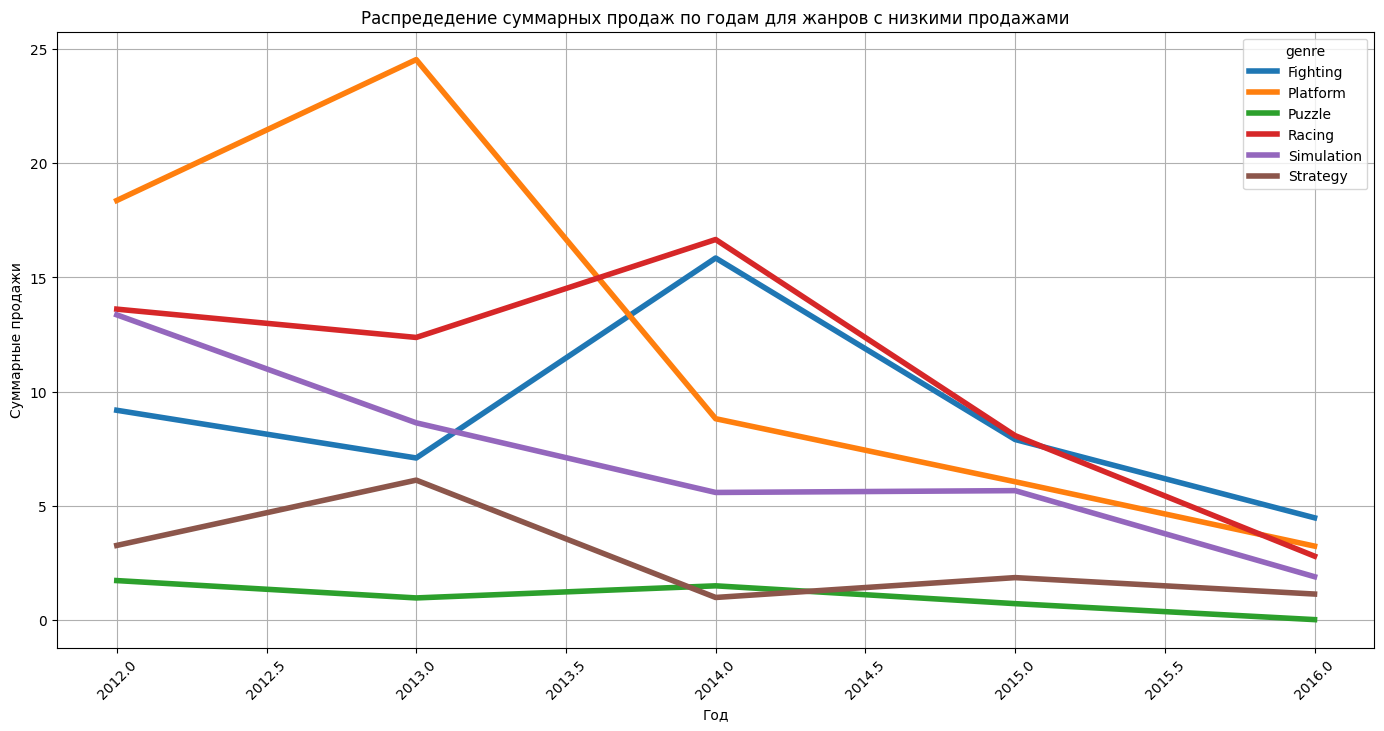

In [43]:
games_act_gen_untop.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum')\
            .plot(kind='line', grid=True, rot=45, figsize=(17,8), linewidth=4)
plt.title("Распредедение суммарных продаж по годам для жанров с низкими продажами")
plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.show()

Разделение по количеству игр у нас логично совпало и с раделением по уровню продаж. Из жанров, игр которых меньше в наших данных, лидируют платформеры, гонки, драки и симуляторы, а продажи стратегий и пазлов вообще на минимуме.  
  
Хотя высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами экшена. Чтобы проверить это, рассмотрим медианные продажи по жанрам.

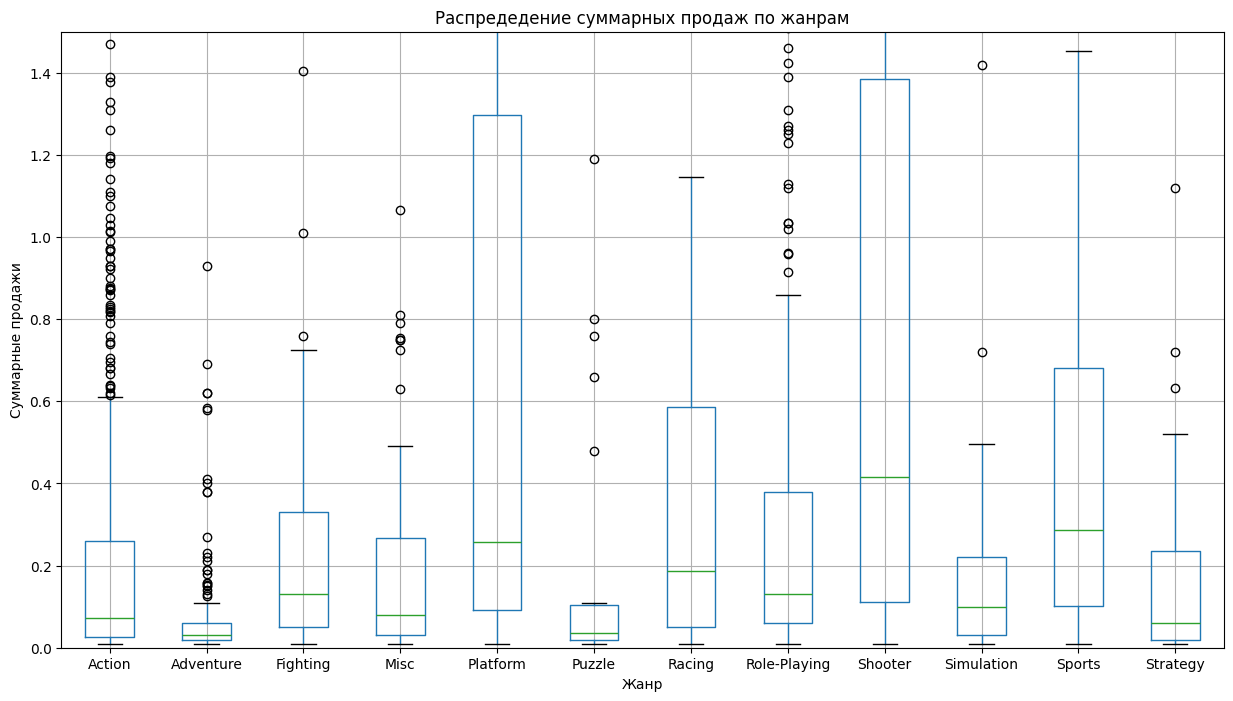

In [44]:
games_act.pivot_table(index='name', columns='genre', values='sum_sales')\
            .boxplot(grid=True, figsize=(15,8))
plt.title("Распредедение суммарных продаж по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи")
plt.ylim([0,1.5])
plt.show()

По медианным продажам видим, что у экшена продаж мало, зато по таблице количества игр в начале шага видим, что этих игр очень много, значит этот жанр берёт количеством. А вот шутеры наоборот - игр гораздо меньше, зато продаются лучше. Количество ролевых игр, спортивных, миск и приключений примерно одинаково, они берут продажами.

**Общий вывод  
С 2012ого года начался резкий спад продаж игр примерно в два раза от пика 2008ого года, поэтому выбрали актуальным период с 2012ого года. Максимальные продажи за весь период были у платформ PS2, X360, PS3, Wii, DS и PS, более 700 миллионов копий. Средняя "продолжительность жизни" платформы около 7 лет, дальше продажи быстро идут на спад.  
Выбрав данные только за актуальный период, составили ТОП-5 платформ - PS4, PS3, X360, 3DS и XOne. Продажи PS4 и XOne растут, поэтому посчитали эти платформы потенциально прибыльными, у остальных же платформ с 2013-14ого годов продажи падают.  
Уровень продаж у игр платформ Play Station, X-Box и Nintendo - медиана на уровне 200 тысяч копий на игру, у Х360 даже на уровне 300 тысяч, у остальных же платформ гораздо ниже - 50-100 тысяч копий на игру.  
По анализу диаграмм рассеяния и по коэффициенту корреляции поняли, что от оценок пользователей продажи игр практически не зависят, что не скажешь про оценки критиков, от них продажи зависят немного больше.  
По жанрам увидели следующее распределение: больше всего и с большим отрывом у нас игр (и соответственно продаж) жанра экшен, игр жанра шутер меньше, но продаются они лучше, потом примерно поровну ролевых, приключений, спорта и миск. Отстают гонки, драки, платформеры, симуляторы, стратегии и пазлы.**

## Составим портрет пользователя каждого региона (NA, EU, JP)

### Определим для пользователя каждого региона самые популярные платформы (топ-5). Опишем различия в долях продаж.

Посмотрим в сравнении все платформы и продажи на всех рынках, а дальше рассмотрим каждый рынок по отдельности

In [45]:
columns=['na_sales','eu_sales','jp_sales','other_sales','sum_sales']
games_act.groupby('platform')[columns].sum()\
                        .sort_values(by='sum_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,sum_sales
platform,,,,,
PS4,108.74,141.09,15.96,48.35,314.14
PS3,103.38,106.86,35.29,43.26,288.79
X360,140.05,74.52,1.57,20.40,236.54
3DS,55.31,42.64,87.79,8.87,194.61
XOne,93.12,51.59,0.34,14.27,159.32
WiiU,38.10,25.13,13.01,5.95,82.19
PC,19.12,37.76,0.00,5.77,62.65
PSV,10.98,11.36,21.04,5.80,49.18
Wii,17.45,11.92,3.39,2.61,35.37


#### Пользователи североамериканского региона

In [46]:
games_act_pl_na=games_act.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
games_act_pl_na['percent']=(games_act_pl_na['na_sales']/games_act_pl_na['na_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_pl_na.head()

,platform,na_sales,percent
0,X360,140.05,23.7
1,PS4,108.74,18.4
2,PS3,103.38,17.5
3,XOne,93.12,15.8
4,3DS,55.31,9.4


У пользователей североамериканского региона популярны платформы Х360 (24%), PS4(18%), PS3(18%), XOne(16%) и 3DS(9%)

#### Пользователи европейского региона

In [47]:
games_act_pl_eu=games_act.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
games_act_pl_eu['percent']=(games_act_pl_eu['eu_sales']/games_act_pl_eu['eu_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_pl_eu.head()

,platform,eu_sales,percent
0,PS4,141.09,27.8
1,PS3,106.86,21.1
2,X360,74.52,14.7
3,XOne,51.59,10.2
4,3DS,42.64,8.4


У пользователей европейского региона популярны платформы PS4(28%), PS3(21%), Х360 (15%), XOne(10%) и 3DS(8%)

#### Пользователи японского региона

In [48]:
games_act_pl_jp=games_act.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
games_act_pl_jp['percent']=(games_act_pl_jp['jp_sales']/games_act_pl_jp['jp_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_pl_jp.head()

,platform,jp_sales,percent
0,3DS,87.79,45.6
1,PS3,35.29,18.3
2,PSV,21.04,10.9
3,PS4,15.96,8.3
4,WiiU,13.01,6.8


У пользователей японского региона популярны платформы 3DS(46%), PS3(18%), PSV(11%), PS4(8%) и WiiU(7%)

В целом по североамериканскому и европейскому рынкам картина примерно одинаковая: популярны платформы XBox и PlayStation, и немного портативная 3DS, а в Японии популярны их собственные портативные платформы Nintendo - 3DS (почти половина продаж) и WiiU, а также опять их же PlayStation.

### Определим для пользователя каждого региона самые популярные жанры (топ-5). Поясним разницу.

Аналогично предыдущему шагу посмотрим в сравнении все жанры и продажи на всех рынках, а дальше рассмотрим каждый рынок по отдельности

In [49]:
games_act.groupby('genre')[columns].sum()\
                        .sort_values(by='sum_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,sum_sales
genre,,,,,
Action,177.84,159.34,52.80,51.14,441.12
Shooter,144.77,113.47,9.23,37.26,304.73
Role-Playing,64.00,48.53,65.44,14.83,192.80
Sports,81.53,69.09,8.01,22.44,181.07
Misc,38.19,26.32,12.86,7.67,85.04
Platform,25.38,21.41,8.63,5.58,61.00
Racing,17.22,27.29,2.50,6.49,53.50
Fighting,19.79,10.79,9.44,4.47,44.49
Simulation,7.97,14.55,10.41,2.19,35.12


Посмотрим в сравнении все платформы и продажи на всех рынках, а дальше рассмотрим каждый рынок по отдельности

#### Пользователи североамериканского региона

In [50]:
games_act_gen_na=games_act.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
games_act_gen_na['percent']=(games_act_gen_na['na_sales']/games_act_gen_na['na_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_gen_na.head()

,genre,na_sales,percent
0,Action,177.84,30.1
1,Shooter,144.77,24.5
2,Sports,81.53,13.8
3,Role-Playing,64.00,10.8
4,Misc,38.19,6.5


У пользователей североамериканского региона популярны жанры экшен (30%), шутеры (24%), спорт (14%), ролевые (11%) и миск (7%)

#### Пользователи европейского региона

In [51]:
games_act_gen_eu=games_act.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
games_act_gen_eu['percent']=(games_act_gen_eu['eu_sales']/games_act_gen_eu['eu_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_gen_eu.head()

,genre,eu_sales,percent
0,Action,159.34,31.4
1,Shooter,113.47,22.4
2,Sports,69.09,13.6
3,Role-Playing,48.53,9.6
4,Racing,27.29,5.4


У пользователей европейского региона популярны жанры экшен (31%), шутеры (22%), спорт (14%), ролевые (10%) и гонки (5%)

#### Пользователи японского региона

In [52]:
games_act_gen_jp=games_act.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
games_act_gen_jp['percent']=(games_act_gen_jp['jp_sales']/games_act_gen_jp['jp_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_gen_jp.head()

,genre,jp_sales,percent
0,Role-Playing,65.44,34.0
1,Action,52.80,27.4
2,Misc,12.86,6.7
3,Simulation,10.41,5.4
4,Fighting,9.44,4.9


У пользователей японского региона популярны жанры ролевые (34%), экшен (27%), миск (7%), симуляторы (5%) и драки (5%)

В целом аналогично анализу платформ североамериканский и европейский рынки похожи: популярны экшен, шутеры, спорт и ролевые. В Японии же больше всего популярны ролевые, затем экшен, миск, симуляторы и драки, вот такой специфичный во всём народ.

### Определим для пользователя каждого региона, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Аналогично предыдущим шагам посмотрим в сравнении продажи игр всех категорий на всех рынках, а дальше рассмотрим каждый рынок по отдельности

In [53]:
games_act.groupby('rating')[columns].sum()\
                        .sort_values(by='sum_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,sum_sales
rating,,,,,
M,231.57,193.96,21.20,63.38,510.11
RP,103.31,91.50,108.84,27.17,330.82
E,114.37,113.03,28.33,31.44,287.17
T,66.02,52.96,26.02,17.94,162.94
E10+,75.70,55.37,8.19,16.23,155.49


Продажи по всему миру в зависимости от рейтинга распределились слудющим образом:  
«М» - («Mature») — «Для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается» - **те самые игры, где в данном столбце были пропуски**  
«E» («Everyone») — «Для всех»  
«T» («Teen») — «Подросткам»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» 

#### Пользователи североамериканского региона

In [54]:
games_act_r_na=games_act.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
games_act_r_na['percent']=(games_act_gen_na['na_sales']/games_act_r_na['na_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_r_na.head()

,rating,na_sales,percent
0,M,231.57,30.1
1,E,114.37,24.5
2,RP,103.31,13.8
3,E10+,75.70,10.8
4,T,66.02,6.5


У пользователей североамериканского региона популярны игры для взрослых (30%) и для всех (24%)

#### Пользователи европейского региона

In [55]:
games_act_r_eu=games_act.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
games_act_r_eu['percent']=(games_act_gen_eu['eu_sales']/games_act_r_eu['eu_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_r_eu.head()

,rating,eu_sales,percent
0,M,193.96,31.4
1,E,113.03,22.4
2,RP,91.50,13.6
3,E10+,55.37,9.6
4,T,52.96,5.4


У пользователей европейского региона популярны игры для взрослых (31%) и для всех (22%)

#### Пользователи япойнского региона

In [56]:
games_act_r_jp=games_act.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
games_act_r_jp['percent']=(games_act_r_jp['jp_sales']/games_act_r_jp['jp_sales'].sum())\
                        .apply(lambda x: round(x * 100, 1))
games_act_r_jp.head()

,rating,jp_sales,percent
0,RP,108.84,56.5
1,E,28.33,14.7
2,T,26.02,13.5
3,M,21.20,11.0
4,E10+,8.19,4.3


У пользователей японского региона из оценённых игр популярны игры для всех (15%) и подростков (14%)

Поскольку компания ESRB работает на североамериканском рынке, то на пользователя европейского рынка она влияет так же, как и на свой, потому что в Европе в основном в американские игры и играют, а вот япойнцы играют в свои игры на cвоих платформах, поэтому больше половины проданных игры ESRB просто не оценивала.

**Общий вывод  
Пользователи североамериканского и европейского регионов играют в экшены и шутеры, а так же в гонки и ролевые игры на платформах Х360 и PS. Портрет японского пользователя отличается, он в основном играет в ролевые игры на 3DS или PS. Можно сказать, что жанры игр, предпочитаемых в регионе, соответствуют менталитету и культуре народа, а платформы используются больше собственного производства. Хотя некоторые платформы поддерживают разные жанры, поэтому и используются по всему миру. Рейтинг ESRB влияет на продажи на североамериканском и европейском рынках, но не на Японском, где сумарные продажи выше у игр без этого рейтинга.**

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проведём двухвыборочный t-тест для проверки гипотезы с двухсторонней альтернативной гипотезой:

H0 : cредние пользовательский рейтинг платформ Xbox One и PC одинаковые  
H1 : cредние пользовательский рейтинг платформ Xbox One и PC неодинаковые  
Нулевую гипотезу формулируем как необходимое нас равенство, альтернативную как двухстороннюю, чтобы проверить весь числовой диапазон - и меньше, и больше  
  
Уровень статистической значимости выберем бОльшее из конвенциональных значений - 5%

In [57]:
games_act_xone=games_act.query('platform=="XOne"') # выделим платформы в две отдельные таблицы
games_act_pc=games_act.query('platform=="PC"')

# Посчитаем средние значения
print(f'Средний пользовательский рейтинг платформы Xbox One: {np.mean(games_act_xone["user_score"]).round(1)}')
print(f'Средний пользовательский рейтинг платформы PC: {np.mean(games_act_pc["user_score"]).round(1)}')

alpha = 0.05
results1 = st.ttest_ind(games_act_xone["user_score"], games_act_pc["user_score"], equal_var=False, \
                                                                            alternative='two-sided')
print('p-значение:', results1.pvalue)
      
if results1.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы Xbox One: 4.8
Средний пользовательский рейтинг платформы PC: 5.3
p-значение: 0.06811033795099537
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не отвергаем - средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые

### Средние пользовательские рейтинги жанров Action и Sports разные.

Проведём двухвыборочный t-тест для проверки гипотезы с двухсторонней альтернативной гипотезой:

H0 : cредние пользовательский рейтинг жанров Action и Sports одинаковые  
H1 : cредние пользовательский рейтинг жанров Action и Sports разные  
Нулевую гипотезу формулируем как равенство, альтернативную как двухстороннюю, чтобы проверить весь числовой диапазон и необходимое нам значение разности рейтингов.   
  
Уровень статистической значимости выберем бОльшее из конвенциональных значений - 5%

In [58]:
games_act_action=games_act.query('genre=="Action"') # выделим платформы в две отдельные таблицы
games_act_sports=games_act.query('genre=="Sports"')

# Посчитаем средние значения
print(f'Средний пользовательский рейтинг жанра Action: {np.mean(games_act_action["user_score"]).round(1)}')
print(f'Средний пользовательский рейтинг жанра Sports: {np.mean(games_act_sports["user_score"]).round(1)}')

alpha = 0.05
results2 = st.ttest_ind(games_act_action["user_score"], games_act_sports["user_score"], equal_var=False, \
                                                                            alternative='two-sided')
print('p-значение:', results2.pvalue)
      
if results2.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 3.5
Средний пользовательский рейтинг жанра Sports: 4.0
p-значение: 0.014166975726904845
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу в пользу двухсторонней альтернативной - средние пользовательские рейтинги жанров Action и Sports разные

**Общий вывод  
Проверили две гипотезы о равенстве пользовательских рейтингов платформ Xbox One и PC - не овергли гипотезу, и разности жанров Action и Sports - отвергли гипотезу в пользу двухсторонней альтернативной.**

## Итоговый вывод

В данном проекте мы получили данные мирового интернет-магазина по продажам игр до 2016ого года и информацией о названии игры, году выпуска, жанре, продажах на североамериканском, европейском и японском рынках в миллионах штук, оценки критиков и пользователей и также возрастная категория.  
  
При подготовке данных мы заменили названия столбцов, приведя их к нижнему регистру, обработали пропуски, удалив две игры без названия, а также заполнив числовые столбцы нулями, а категорию рейтинга на «рейтинг ожидается», преобразовали данные в нужные типы - тип столбца года выпуска на int, а оценку пользователей на float. И посчитали суммарные продажи во всех регионах, записав их в отдельный столбец.

Проведя исследовательский анализ данных мы увидели, что с 2012ого года начался резкий спад продаж игр примерно в два раза от пика 2008ого года, поэтому выбрали актуальным период с 2012ого года. Максимальные продажи за весь период были у платформ PS2, X360, PS3, Wii, DS и PS, более 700 миллионов копий. Средняя "продолжительность жизни" платформы около 7 лет, дальше продажи быстро идут на спад.  
Выбрав данные только за актуальный период, составили ТОП-5 платформ - PS4, PS3, X360, 3DS и XOne. Продажи PS4 и XOne растут, поэтому посчитали эти платформы потенциально прибыльными, у остальных же платформ с 2013-14ого годов продажи падают.  
Уровень продаж у игр платформ Play Station, X-Box и Nintendo - медиана на уровне 200 тысяч копий на игру, у Х360 даже на уровне 300 тысяч, у остальных же платформ гораздо ниже - 50-100 тысяч копий на игру.  
По анализу диаграмм рассеяния и по коэффициенту корреляции поняли, что от оценок пользователей продажи игр практически не зависят, что не скажешь про оценки критиков, от них продажи зависят немного больше.  
По жанрам увидели следующее распределение: больше всего и с большим отрывом у нас игр (и соответственно продаж) жанра экшен, игр жанра шутер меньше, но продаются они лучше, потом примерно поровну ролевых, приключений, спорта и миск. Отстают гонки, драки, платформеры, симуляторы, стратегии и пазлы.  
  
Составили портреты игроков: пользователи североамериканского и европейского регионов играют в экшены и шутеры, а так же в гонки и ролевые игры на платформах Х360 и PS. Портрет японского пользователя отличается, он в основном играет в ролевые игры на 3DS или PS. Можно сказать, что жанры игр, предпочитаемых в регионе, соответствуют менталитету и культуре народа, а платформы используются больше собственного производства. Хотя некоторые платформы поддерживают разные жанры, поэтому и используются по всему миру. Рейтинг ESRB влияет на продажи на североамериканском и европейском рынках, но не на Японском, где сумарные продажи выше у игр без этого рейтинга.  
  
Проверили гипотезы: о равенстве пользовательских рейтингов платформ Xbox One и PC - не овергли гипотезу, и разности жанров Action и Sports - отвергли гипотезу в пользу двухсторонней альтернативной.  
  
Можем дать рекомендации магазину сделать акцент на продажи игр платформ последних или предпоследних версий PlayStation , также для американского рынка XBox, а для японского - портативных Nintendo. Из жанров выбрать экшены и шутеры, вторые предпочтительнее, они лучше продаются, а для японцев - ролевые игры. И конечно следует обращать внимание на игры, высоко оценённые критиками, такие покупают больше. Касаемо качества данных - рекомендуем тщательнее заполнять данные по играм (особенно их названия), в частности года выпуска, а также заполнять оценки пользователей и критиков, или хотя бы начать с нуля, и проставлять возрастные категории, а если их нет, то заполнить категорией ожидания рейтинга.